In [1]:
# import dependencies 
import pandas as pd 
import matplotlib.pyplot as lib 
import numpy as np
# Import the API key.
from config import weather_api_key


In [34]:
# store the lat and long
# delcare each array as var 
# 6.1.4

# generate random lat 
lats = np.random.uniform(low=-90.000, high = 90.000, size = 1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size = 1500)

# create zip object in memory (packing the two together)
lat_lngs = zip(lats, lngs)
# packed into tuple (1500 of them) and access as 0,1 index form
lat_lngs


In [35]:
# practice unpacking a zip for our tuple lats and lngs
lats = [25.12903645, 25.92017388, 26.62509167, -59.98969384, 37.30571269]
lngs = [-67.59741259, 11.09532135, 74.84233102, -76.89176677, -61.13376282]
lat_lngs = zip(lats, lngs)

In [36]:
# unpack the lat_lngs zip object into list type
# cannot simply print out coordinates on its own without using 0,1 indexing
coordinates = list(lat_lngs)

    

In [37]:
for coordinate in coordinates:
    print(coordinate[0], coordinate[1])

25.12903645 -67.59741259
25.92017388 11.09532135
26.62509167 74.84233102
-59.98969384 -76.89176677
37.30571269 -61.13376282


In [38]:
# 6.1.5 generate random wolrd cities 
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [39]:
# iterate through the coordinates unzipped tuple 
# use citypy and add lat, long
# print the city name, chain the name to the nearest city function
# print the country name, chain the country code to nearest city function 

# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
print(cities)
len(cities)

['cockburn town', 'gat', 'parvatsar', 'punta arenas', 'saint george']


5

In [40]:
# Import the requests library.
import requests


# Import the API key.
from config import weather_api_key


In [41]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=fd1fbd1a397ad51b5a5aa7507997d4cf


In [42]:
# 6.2.3 we can then add our city to the URL for current weather data
# Create an endpoint URL for a city.
city_url = url + "&q=" + "Boston"
print(city_url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=fd1fbd1a397ad51b5a5aa7507997d4cf&q=Boston


In [43]:
# 6.2.4 make a request for data to an API 
# Make a 'Get' request for the city weather.
city_weather = requests.get(city_url)
city_weather

<Response [200]>

In [44]:
# check if we get a valid response 
# write a conditional to eval if status code = 200 
# if not, then print that the weather not found 
# Create an endpoint URL for a city.
city_url = url + "&q=" + "Boston"
city_weather = requests.get(city_url)
if city_weather.status_code == 200:
    print(f"City Weather found.")
else:
    print(f"City weather not found.")

City Weather found.


In [45]:
# Create an endpoint URL for a city.
city_url = url + "&q=" + "Bston"
city_weather = requests.get(city_url)
if city_weather.status_code == 200:
    print(f"City Weather found.")
else:
    print(f"City weather not found.")

City weather not found.


In [46]:
# final df needs: 
# city, country, date 
# lat, lng
# max temp 
# humidity
# cloudiness
# wind speed 

# Create an endpoint URL for a city.
city_url = url + "&q=" + "Boston"
city_weather = requests.get(city_url)
city_weather.json()

{'coord': {'lon': -71.0598, 'lat': 42.3584},
 'weather': [{'id': 801,
   'main': 'Clouds',
   'description': 'few clouds',
   'icon': '02d'}],
 'base': 'stations',
 'main': {'temp': 54.91,
  'feels_like': 51.48,
  'temp_min': 49.95,
  'temp_max': 58.93,
  'pressure': 1029,
  'humidity': 29},
 'visibility': 10000,
 'wind': {'speed': 19.57, 'deg': 50},
 'clouds': {'all': 20},
 'dt': 1652134191,
 'sys': {'type': 2,
  'id': 2013408,
  'country': 'US',
  'sunrise': 1652088562,
  'sunset': 1652140321},
 'timezone': -14400,
 'id': 4930956,
 'name': 'Boston',
 'cod': 200}

In [47]:
# we saw that sys holds our country code in the JSON output
# Get the JSON data by making a var to run our city_weather
boston_data = city_weather.json()

In [48]:
# put it all together 
lat = boston_data["coord"]["lat"]
lng = boston_data["coord"]["lon"]
max_temp = boston_data["main"]["temp_max"]
humidity = boston_data["main"]["humidity"]
clouds = boston_data["clouds"]["all"]
wind = boston_data["wind"]["speed"]
print(lat, lng, max_temp, humidity, clouds, wind)

42.3584 -71.0598 58.93 29 20 19.57


In [49]:
# convert the timestamp 
# Import the datetime module from the datetime library.
from datetime import datetime
# Get the date from the JSON file.
date = boston_data["dt"]
# Convert the UTC date to a date format with year, month, day, hours, minutes, and seconds.
# add the strftime to have a conversion 
datetime.utcfromtimestamp(date).strftime('%Y-%m-%d %H:%M:%S')

'2022-05-09 22:09:51'

In [50]:
# 6.2.6 get the city weather data 
# have to be considerate that drawing data from 500+ cities from API
# not the same as just the boston_data 

# PSEUDOCODE

# 1. import dependencies, initialize counters and a list to hold weather data
# 2. loop through the 500 cities list 
# 3. group the cities in 50s to make it easier 
# 4. Use a counter for 1-50 and another for sets 
# 5. build city_url/endpoints for each city 
# 6. make the API request for each city
# 7. parse JSON for all our categories needed 
# 8. add the data to list in a dictionary format and convert it to a df
# 9. print the df and format as needed 

In [51]:
# 1. import dependencies, initialize counters and a list to hold weather data
import time
from datetime import datetime 

In [52]:
city_data = []
print("Beginning Data Retrieval           ")
print("-----------------------------------")

# create counters
# initialize to 1 b/c we want first iteration of logging for each response 
record_count = 1
set_count = 1

# fixed version that adds not city index, but name 
# enumerate helps refrence the index and city in list
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    # remove blank spaces in city name with .replace
    city_url = url + "&q=" + city.replace(" ","+")

    # create print statement to tell us record and set counts 
    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval           
-----------------------------------
Processing Record 1 of Set 1 | cockburn town
Processing Record 2 of Set 1 | gat
Processing Record 3 of Set 1 | parvatsar
Processing Record 4 of Set 1 | punta arenas
Processing Record 5 of Set 1 | saint george
-----------------------------
Data Retrieval Complete      
-----------------------------


In [53]:
# 6.2.7 create the df for city weather data
# now we have a list of dict, use pandas to make our df
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Cockburn Town,21.4612,-71.1419,79.77,75,100,5.37,TC,2022-05-09 22:10:35
1,Gat,31.6100,34.7642,72.39,65,0,7.45,IL,2022-05-09 22:10:36
2,Parvatsar,26.8833,74.7667,83.77,16,14,4.56,IN,2022-05-09 22:08:24
3,Punta Arenas,-53.1500,-70.9167,42.91,81,20,5.75,CL,2022-05-09 22:07:19
4,Saint George,37.1041,-113.5841,71.64,10,0,11.50,US,2022-05-09 22:10:37


In [54]:
# 6.3.1 plot lat vs temp
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

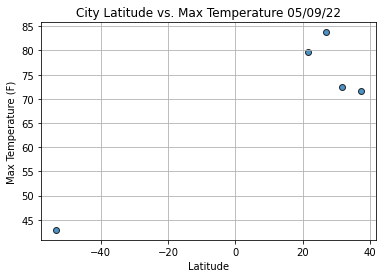

In [55]:
import matplotlib.pyplot as plt

# Import the time module.
import time


# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
#plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()